In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the DataSet

Let us first import NumPy and Pandas and read the bike rental dataset

In [2]:
rental = pd.read_csv('day.csv')

In [3]:
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
rental.shape

(730, 16)

In [5]:
rental.info()
# Data below shows that there are no null entries to be cleaned up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning the Data

##### We already know from rental.info() above that there are no null records to be cleaned up 

#### Dropping redundant columns 
   ##### `instant` is just a sequence column, has no signifance in rental analysis
   ##### `casual` & 'registered' are split of the outcome variable 'cnt' and thus not a genuine predictor variable
   ##### `dteday` is not adding any value as we already have date present in separate columns - year, day, month columns

In [7]:
rental.drop(['instant','casual','registered', 'dteday'], axis = 1, inplace = True)

In [8]:
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Renaming some variable to make it more readable
# PS - Renaming 'yr' to 'yearsSince2018' to indicate this can be a continuos variable with incremental values instead of a categorical variable
# This will indicate we can apply same model with data for furture years as well
rental.rename(columns = {'cnt':'count', 'yr':'yearsSince2018', 'mnth':'month', 'hum':'humidity'}, inplace = True) 

In [10]:
rental.head()

,season,yearsSince2018,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Mapping the category variables into categories (We will later convert them to dummies)
# This is important as the current values have categories represented as numbers - '1', '2', '3', ...
# This may falsely indicate to our model that there is some order to them which is actually not the case

rental['season'] = rental['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
rental['month'] = rental['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
rental['weekday'] = rental['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
rental['weathersit'] = rental['weathersit'].map({1:'clear',2:'misty',3:'lightSnowRain',4:'heavySnowRain'})

In [12]:
rental.head()

,season,yearsSince2018,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising & Preparing the Data

### Visualisation
Let's now spend some time - **understanding the data**. This is a key step that heps identifying :
- Some predictors directly having a strong association with the outcome variable
- Any obvious multicollinearity going on

### Preparation
We will convert categorical variable into dummy variables in order to fir a regression line

We'll visualise & prepare our data using libraries - `matplotlib` and `seaborn`.



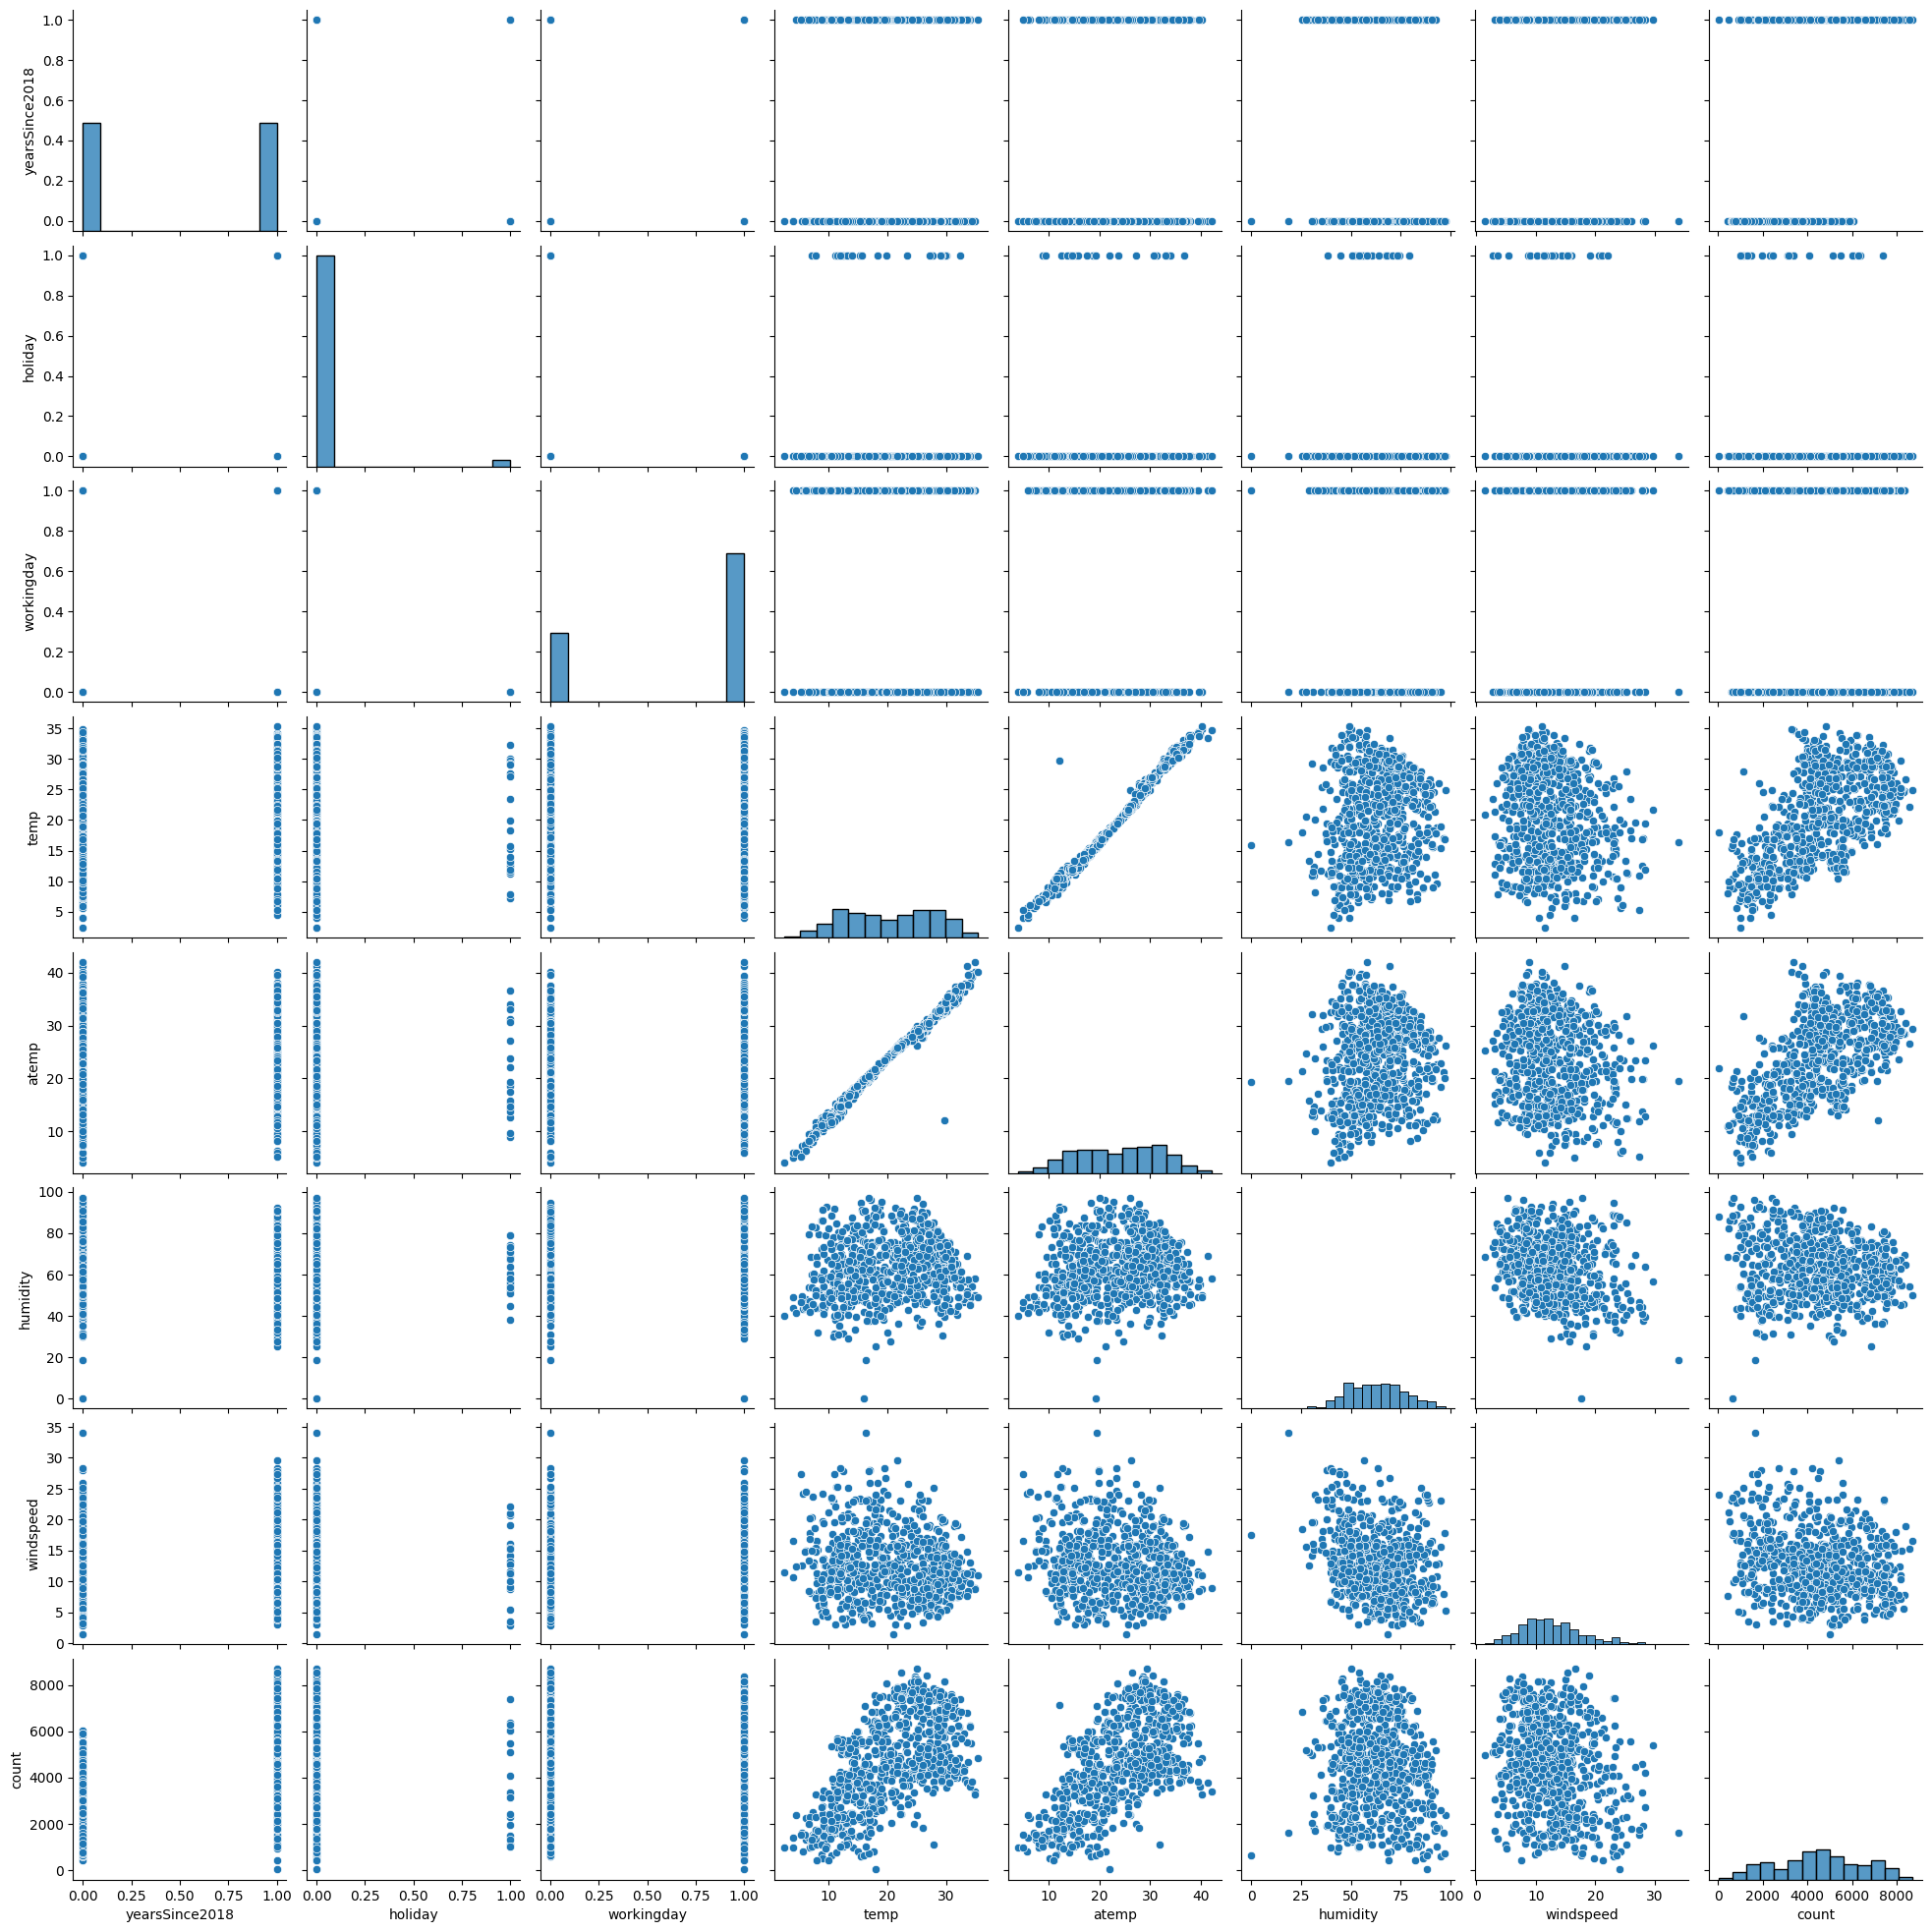

In [13]:
sns.pairplot(rental)
plt.show()

# Based on below graphs, we see some 
   # 1. some predictors like 'temp' showing very close linear association with count 
   # 2. patterns of multicollinearity for ex - 'temp' & 'atemp' seem lineraly associated
# We will verify these soon with our model but good to have a basic idea of data association patterns

##### Visualising the categorical predictors using box plot below
##### Lets see the patterns of rental count across different categories of predictor variables


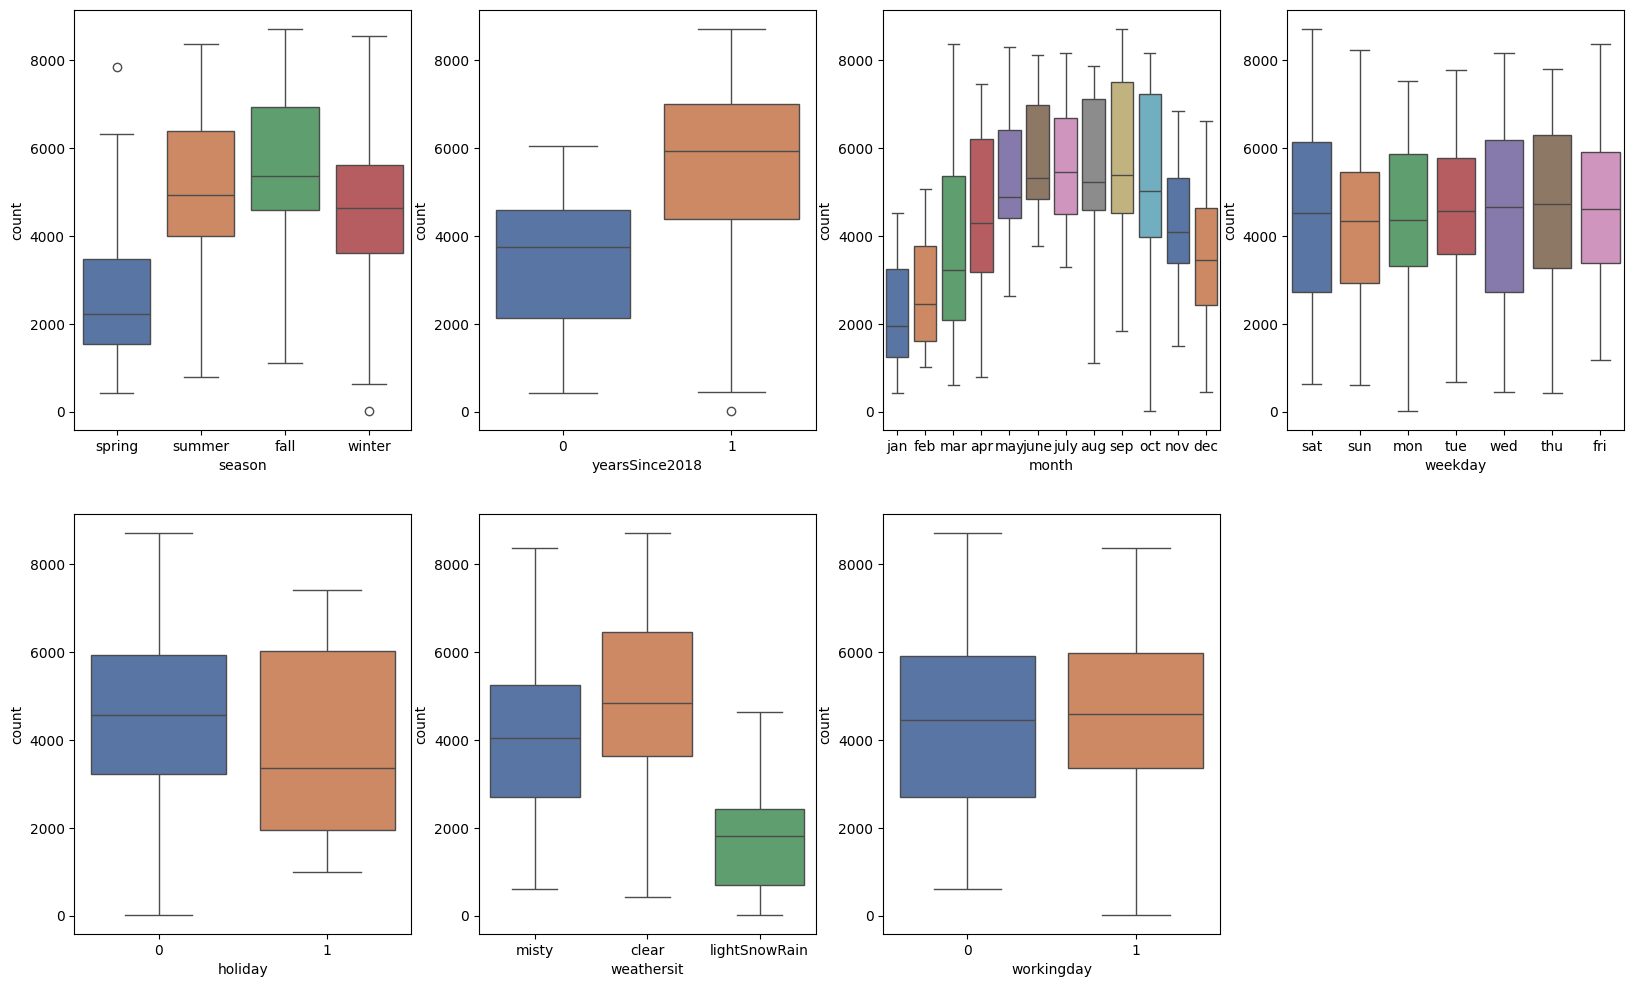

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,2)
sns.boxplot(x = 'yearsSince2018', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'count', data = rental, palette="deep")
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'count', data = rental, palette="deep")
plt.show()


#### Key observations from above boxplots -
  ##### 1. Rental counts seem to be much less in spring as compared to other seasons. Higher sale in specially summer & fall is also observable from month boxplot
  ##### 2. Rentals counts in 2019 are much higher than in 2018
  ##### 3. Weather wise clear or misty weather leads to more rental (which seems logical as it will difficult to ride bikes in heavy snow/stor//rain)

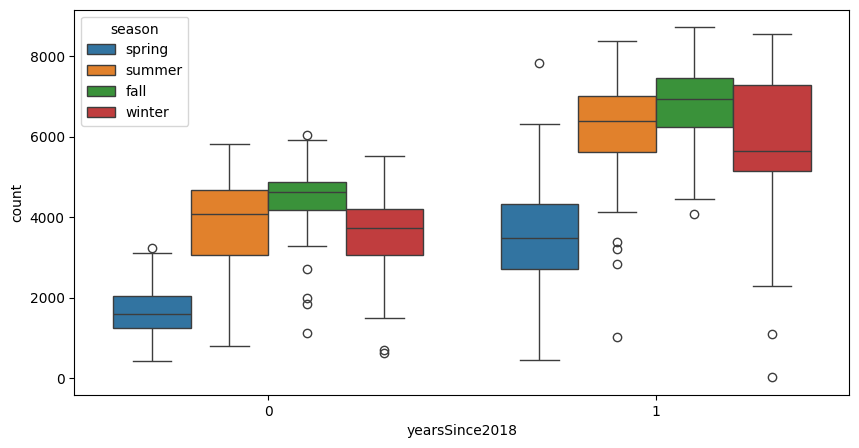

In [15]:
# visualising year & season together
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yearsSince2018', y = 'count', hue = 'season', data = rental)
plt.show()

# Based on the graph below the season wise patter seems consitent acorss both years

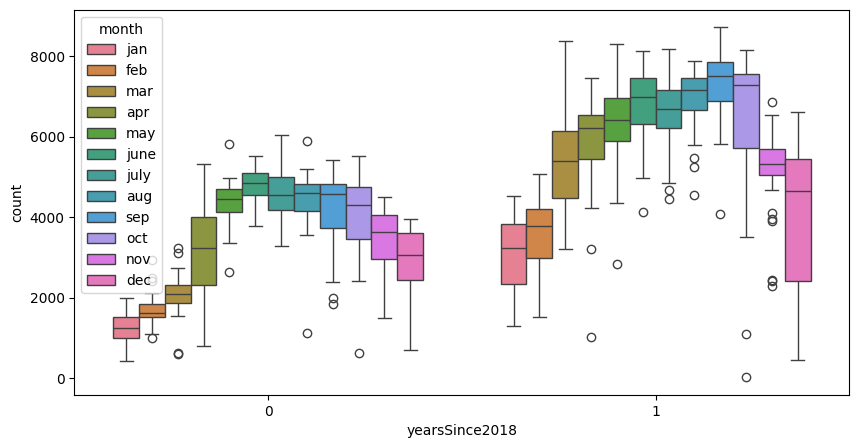

In [16]:
# visualising year & month together
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yearsSince2018', y = 'count', hue = 'month', data = rental)
plt.show()

#### Data Prepartion - converting into dummy variables

In [17]:
# list of variables to convert. PS - No need to do anything with 'yearsSince2018', 'holiday' & 'workingday' as these are already having only 2 values 0 & 1
# Note that we are dropping first column as part of get_dummies as n unique category values can be represented by n-1 dummy variables
months_df=pd.get_dummies(rental.month, dtype='int', drop_first=True)
weekdays_df=pd.get_dummies(rental.weekday, dtype='int', drop_first=True)
weathersit_df=pd.get_dummies(rental.weathersit, dtype='int', drop_first=True)
seasons_df=pd.get_dummies(rental.season, dtype='int', drop_first=True)

In [18]:
# Adding the new dummy columns to main dataset
rental = pd.concat([rental,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [19]:
rental.head()

,season,yearsSince2018,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [20]:
# dropping the old categorical columns
rental.drop(['month','weekday','weathersit','season'], axis = 1, inplace = True)

In [21]:
rental.head()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
rental.info() # Visualising final set of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearsSince2018  730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   count           730 non-null    int64  
 8   aug             730 non-null    int64  
 9   dec             730 non-null    int64  
 10  feb             730 non-null    int64  
 11  jan             730 non-null    int64  
 12  july            730 non-null    int64  
 13  june            730 non-null    int64  
 14  mar             730 non-null    int64  
 15  may             730 non-null    int64  
 16  nov             730 non-null    int64  
 17  oct             730 non-null    int

## Step 4 : Splitting the data into train-test sets

We will do a 70-30 split for converting given data into train & test data set


In [23]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
df_train.shape

(510, 30)

In [25]:
df_test.shape

(219, 30)

#### Using min max scaler to rescale the predictor variables' values
This is to ensure all values fit between fixed range 0-1 and their coefficients are comparable

In [26]:
# visualising data to identify variables that need scaling
rental.head()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [27]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [29]:
df_train.describe()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


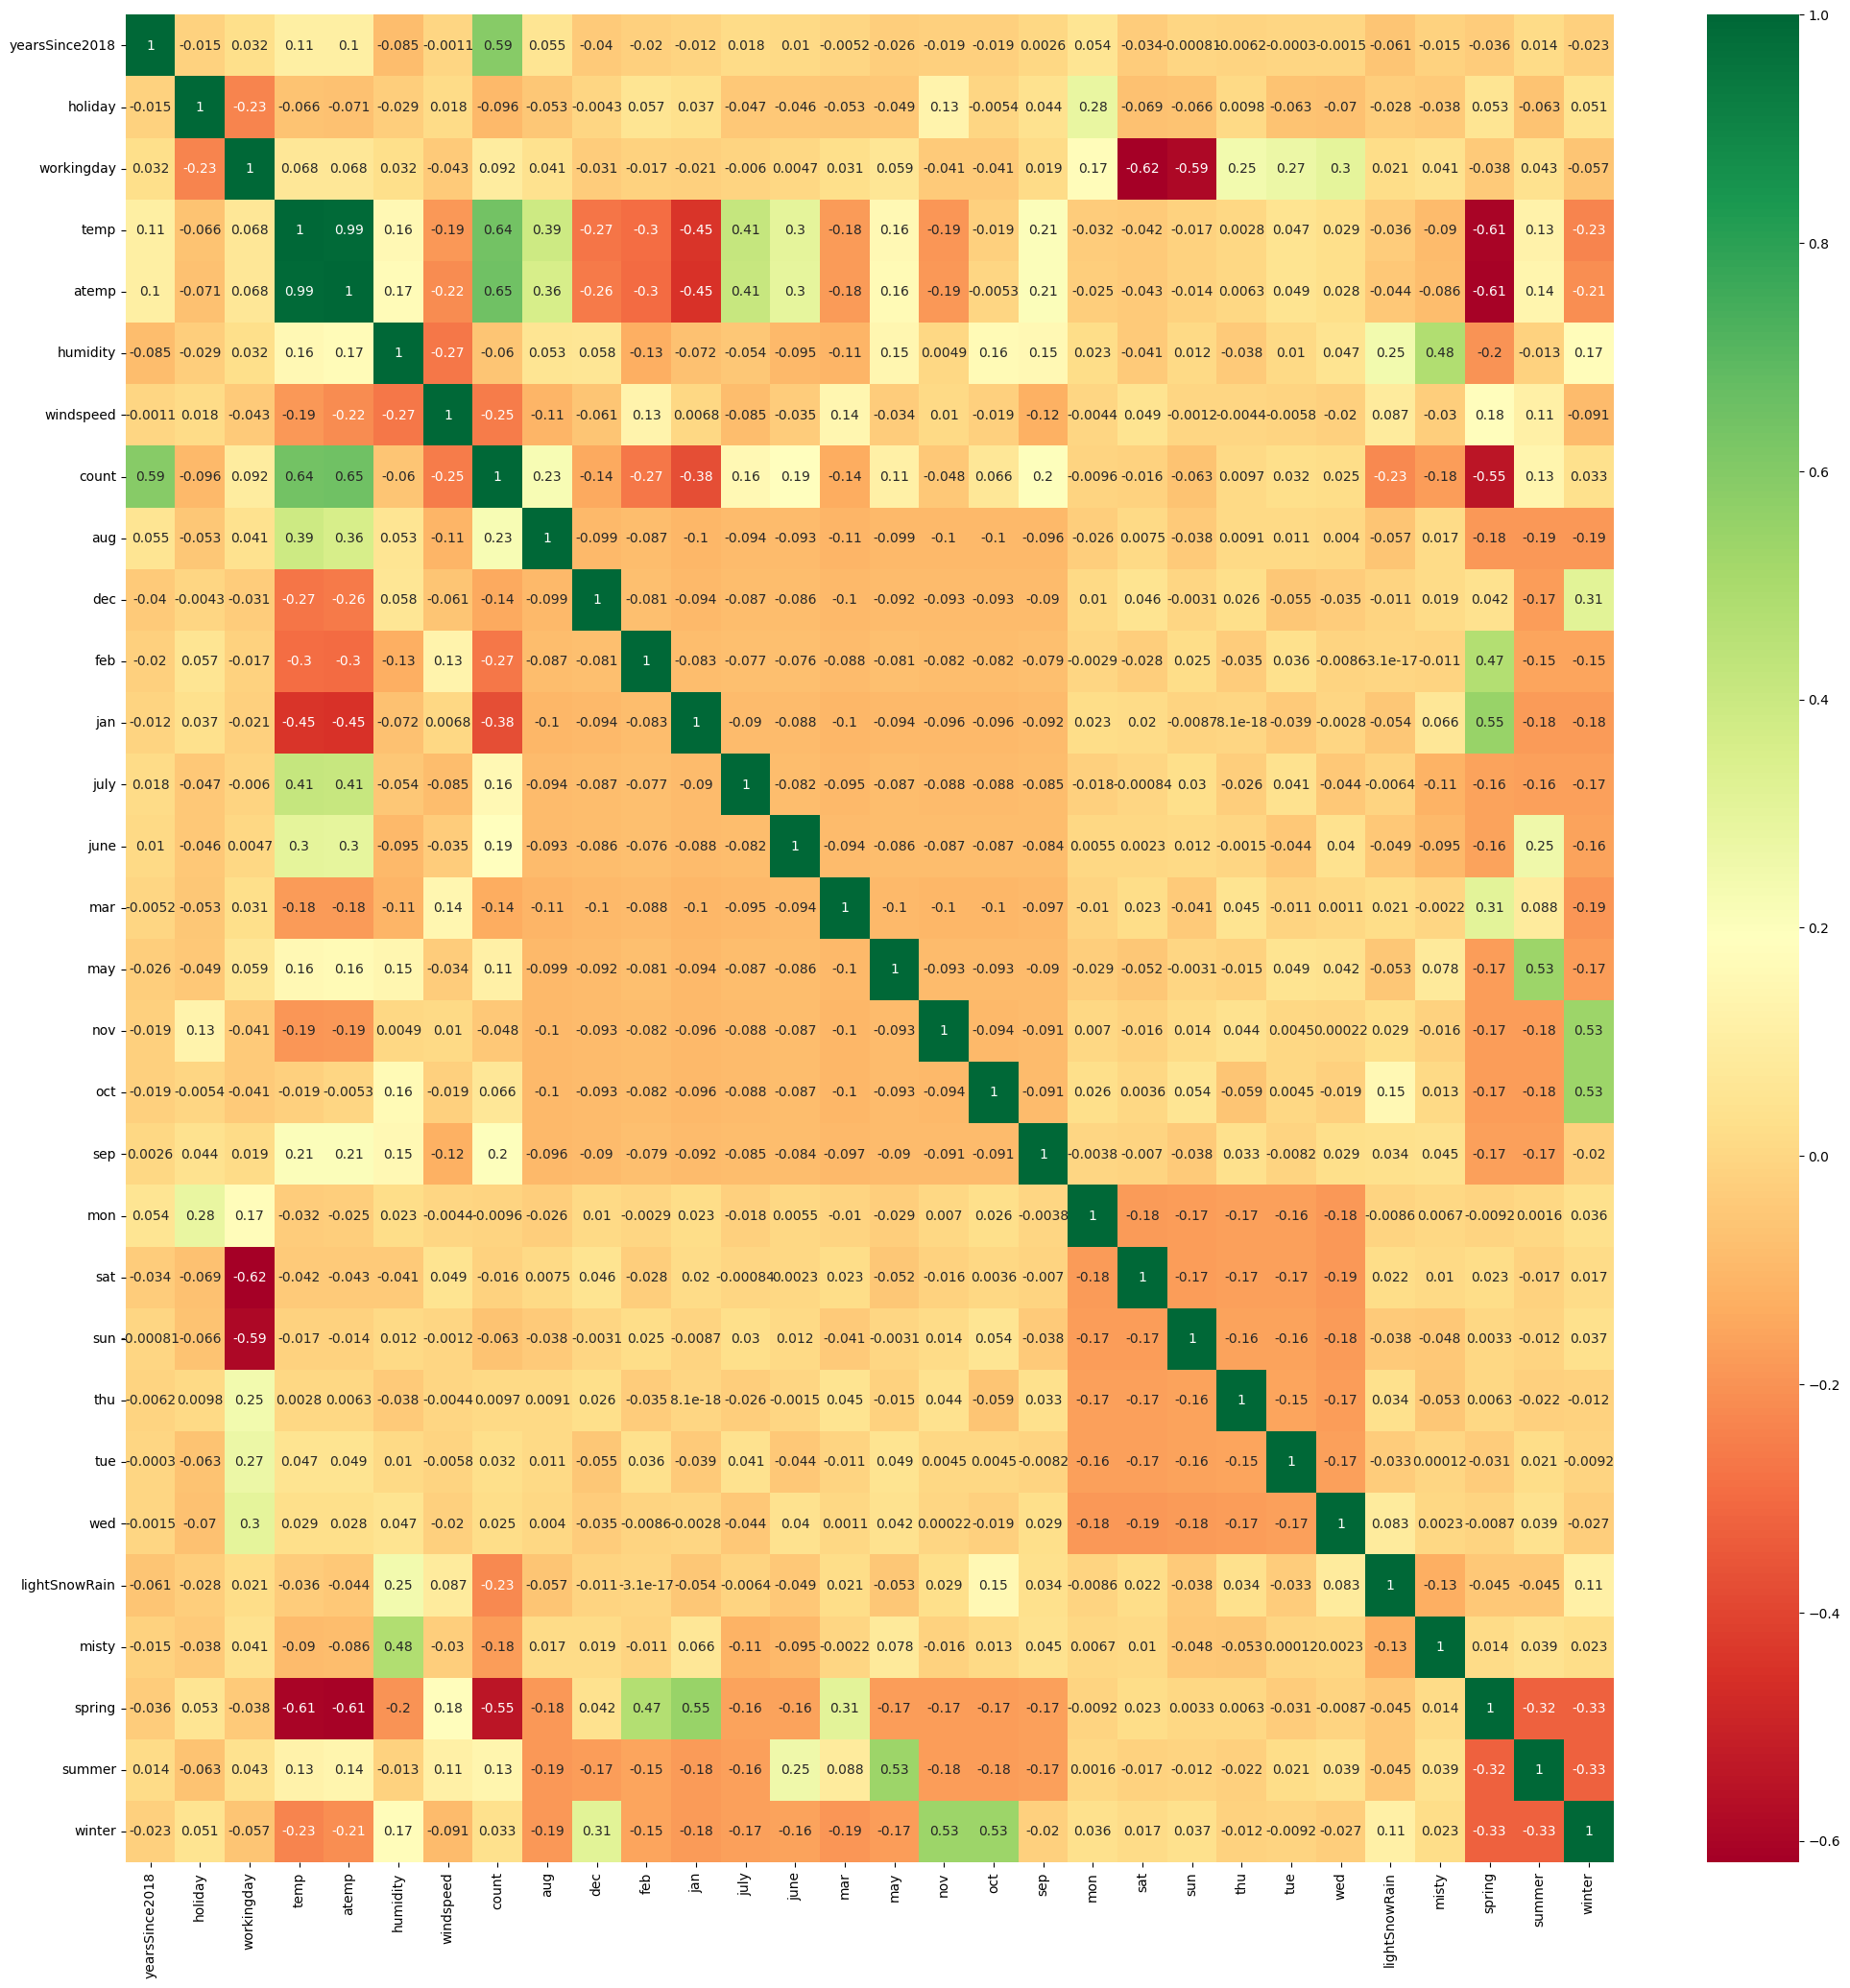

In [30]:
# Checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()


### Based on above matrix, we can see that temp & yearsSince2018 show good corellation with count. There is also very strong correlation between temp & atemp. We can also notice coorelation of seasons like winter, summer with particular months

#### temp & atemp close coorelation indicates thay atemp is derived from temp. We can drop atemp right now but I am keeping it for now as we will eliminate it during predictor variable selection or while refining our model. Doing it later will help us validate that our approach for model making is correct

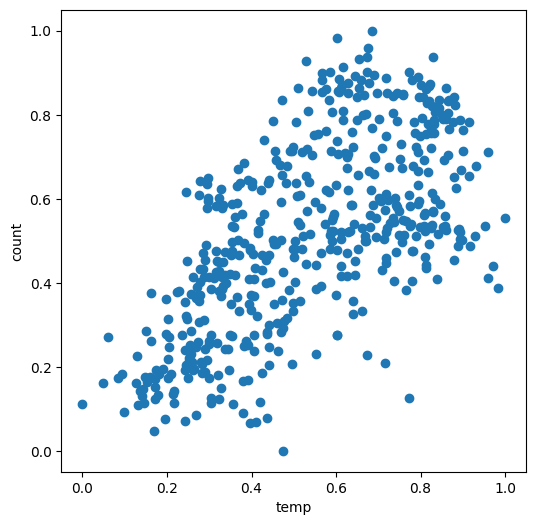

In [31]:
# Lets see a scatter plot to closely visualise temp coorelation with count
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train['count'])
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

## Step 5 : Building a multi linear model

We will build a model on train data set & later validate it on test data set.
To begin with, we need to identify key predcitors that should be a part of the model. We will use automated approach - `RFE` for that. We will start conservatively by picking about 15 variables and then further refine our model by eliminating more predictors based on p-value, f-statistics & VIF

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearsSince2018  510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   count           510 non-null    float64
 8   aug             510 non-null    int64  
 9   dec             510 non-null    int64  
 10  feb             510 non-null    int64  
 11  jan             510 non-null    int64  
 12  july            510 non-null    int64  
 13  june            510 non-null    int64  
 14  mar             510 non-null    int64  
 15  may             510 non-null    int64  
 16  nov             510 non-null    int64  
 17  oct             510 non-null    int64  

In [33]:
# Splitting predictor (X) and outcome (Y) variables
y_train = df_train.pop('count')
X_train = df_train

In [34]:
# Creating linear regression model & fitting it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
# Recursive feature elimination (RFE)
# Since we have 30 variables, we can fairly start with top 15 predictors
# This is a conservative approach but we will eliminate more predictors as we refine our model furthe
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
# Lets see which variables are picked by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yearsSince2018', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 15),
 ('tue', False, 10),
 ('wed', False, 12),
 ('lightSnowRain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [37]:
# Listing the predictor variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [38]:
# Predictor variables chosen by RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['yearsSince2018', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'lightSnowRain', 'misty',
       'spring', 'summer', 'winter'],
      dtype='object')


#### Building model using statsmodel, for detailed statistics

In [39]:
# Creating X_train dataframe with RFE selected variables

X_train = X_train[col]

In [40]:
# Adding a constant variable as required due to statsmodels API limitation
X_train_rfe = sm.add_constant(X_train)

In [41]:
X_train_rfe.head()

,const,yearsSince2018,holiday,workingday,temp,humidity,windspeed,july,sep,sat,sun,lightSnowRain,misty,spring,summer,winter
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0


In [42]:
# Creating the first model

lm_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        20:48:58   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

#### Key observations based on above model stats -
1. Model has good R2 and adjusted R2 (~.84) so the model is good
2. But we also see certain repdictors like holiday showing high p value which indicates that such preditors might not be relevant

In [43]:
# We should also check VIF to measure colinearity among predictor variables. Lets first create a generic function for VIF

# Defining the map function to print the names of all the feature variables and their respective VIFs
def print_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [44]:
print_vif(X_train)

,Features,VIF
2,workingday,50.69
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.61
4,humidity,1.91
11,misty,1.57


#### We now see there are certain predictor variables with high p-value & certain with high VIF
As we should eliminate 1 variable at a time, we will eliminate `holiday` which has a high p value and recheck all statistics

In [45]:
# Dropping `holiday` variable
X_train = X_train.drop(['holiday'], axis = 1)

In [46]:
# Creating 2nd model

X_train_rfe = sm.add_constant(X_train)

lm_2 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        20:48:58   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1799      0.042      4.

In [47]:
print_vif(X_train)

,Features,VIF
3,humidity,32.14
2,temp,18.98
1,workingday,18.41
7,sat,4.91
4,windspeed,4.90
11,spring,4.80
8,sun,4.76
13,winter,3.71
12,summer,3.03
10,misty,2.31


##### As we can see, the VIF for variables have changed after eliminating 1 variable. 
##### Lets now drop `humidity` as its VIF value is very high & build new model

In [48]:
# Dropping `humidity` variable
X_train = X_train.drop(['humidity'], axis = 1)

In [49]:
# Creating 3rd model

X_train_rfe = sm.add_constant(X_train)

lm_3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.73e-189
Time:                        20:48:58   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1005      0.038      2.

In [50]:
print_vif(X_train)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
6,sat,4.45
7,sun,4.21
10,spring,3.82
12,winter,2.80
11,summer,2.75
0,yearsSince2018,2.07
4,july,1.60


##### The good thing is that the model still has a very good R2 and adjusted R2 value. 
##### Lets now drop `workingday` as its VIF value is very high & build new model

In [51]:
# Dropping `workingday` variable
X_train = X_train.drop(['workingday'], axis = 1)

In [52]:
# Creating 4th model

X_train_rfe = sm.add_constant(X_train)

lm_4 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.01e-186
Time:                        20:48:58   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2005      0.030      6.

In [53]:
print_vif(X_train)

,Features,VIF
1,temp,5.17
2,windspeed,4.62
10,summer,2.23
9,spring,2.11
0,yearsSince2018,2.07
11,winter,1.82
3,july,1.59
8,misty,1.55
4,sep,1.33
5,sat,1.22


#### We will now drop `sat` due to its high p-value & proceed with rebuilding the model


In [54]:
# Dropping `sat` variable
X_train = X_train.drop(['sat'], axis = 1)

In [55]:
# Creating 5th model

X_train_rfe = sm.add_constant(X_train)

lm_5 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.65e-187
Time:                        20:48:58   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2036      0.030      6.

In [56]:
print_vif(X_train)

,Features,VIF
1,temp,5.13
2,windspeed,4.60
9,summer,2.22
8,spring,2.09
0,yearsSince2018,2.07
10,winter,1.80
3,july,1.59
7,misty,1.55
4,sep,1.33
5,sun,1.17


#### Now we have `temp` showing VIF > 5 & we have July with high p-value. 
#### Lets remove July as practically there is a chance that these 2 variable are coorelated due to high temperate in July
Please note that removing 'temp' is not our first instinct here as during initial data analysis, we saw a close coorelation between `temp` and outcome variable `count`

In [57]:
# Dropping `july` variable
X_train = X_train.drop(['july'], axis = 1)

In [58]:
# Creating 6th model

X_train_rfe = sm.add_constant(X_train)

lm_6 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.93e-187
Time:                        20:48:58   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1958      0.030      6.

In [59]:
print_vif(X_train)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yearsSince2018,2.07
7,spring,2.00
8,summer,1.90
9,winter,1.64
6,misty,1.54
3,sep,1.22
4,sun,1.17
5,lightSnowRain,1.08


### Above model looks good & we can now proceed with testing this model because -
    1. All predictor variables have VIF < 5 i.e. no evident collinearity to worry about
    2. All predictor variables seem significant based on p-values
    3. Model's F-statistic:250.3 is pretty good & p-value is almost 0, thus indicating this is a strong model
    4. R2 (0.834) & adjusted R2 (0.830 indicate a high proportion of the variance in the response variable

**Note** that while we can still further try to refine the model by eliminating variable 'spring' due to p-value 0.006 but it lead to reduction in R2 & adjusted R2. Hence we did not attempt that here. p-value of 0.006 is acceptable & spring's coefficient can be safely considerd significant

## Step 7: Residual Analysis
We will now verify other criteriaf of linear regression to conclude our model is reliable
1. Verify if error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.
2. No relation of residual with any variable

In [60]:
y_train_pred = lm_6.predict(X_train_rfe)

In [61]:
# Calculate residual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

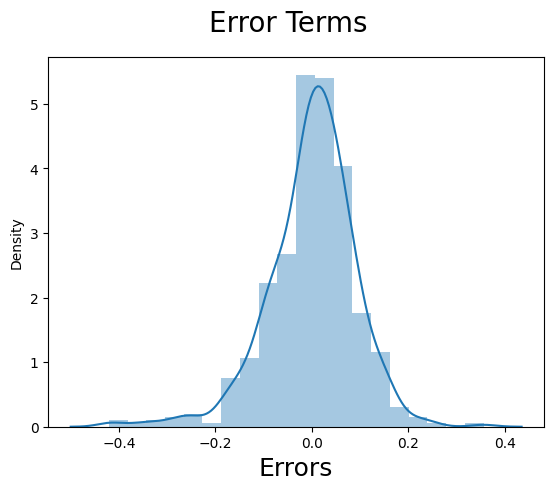

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### The residual seems normally distributed, so one assumption/criteria of linear distribution is satisfied
Next, lets verify that residual is not strongly correlated with X or y variables

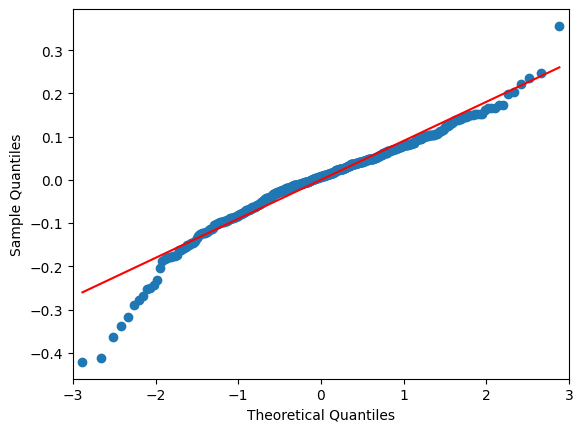

In [63]:
# We can also check q-q plot of residuals
sm.qqplot(res, line='r')
plt.show()

#### Verifying Linearity 

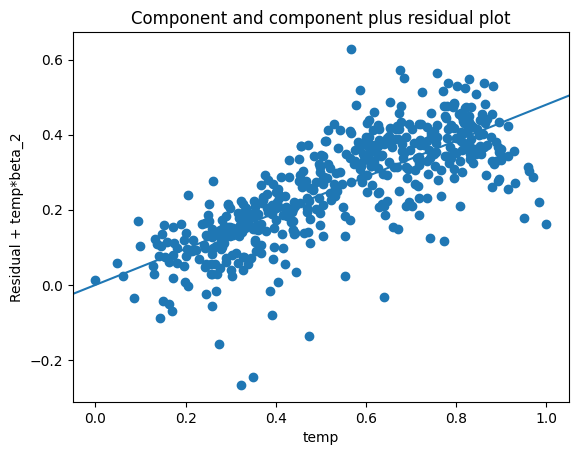

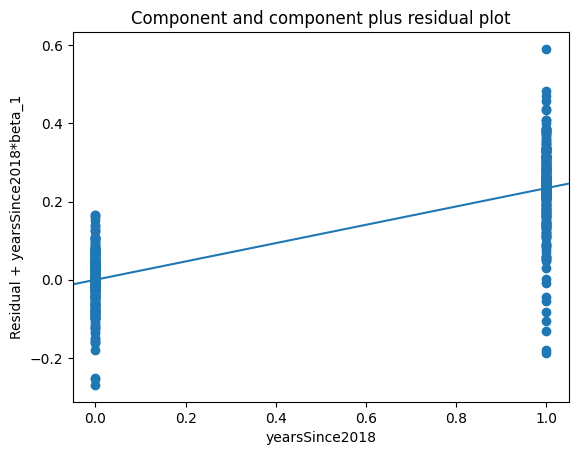

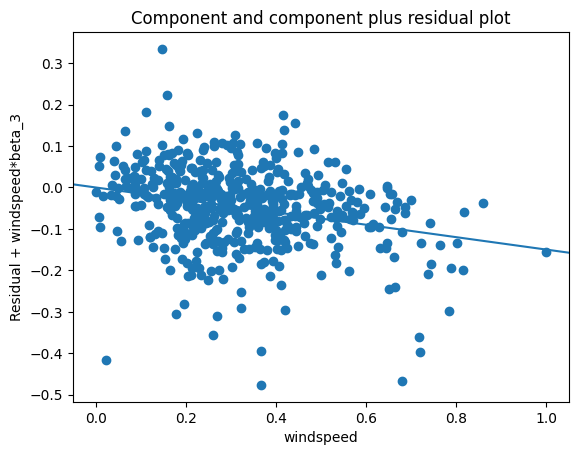

In [64]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'yearsSince2018')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()

#### Homoscedasticity

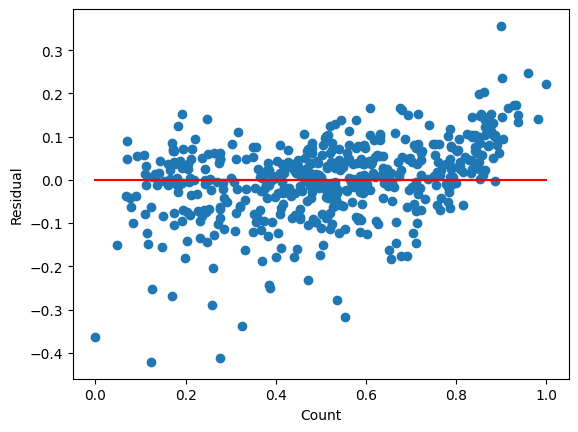

In [65]:
plt.scatter(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### verifying residual is not showing a constant pattern with preditor or outcome variables

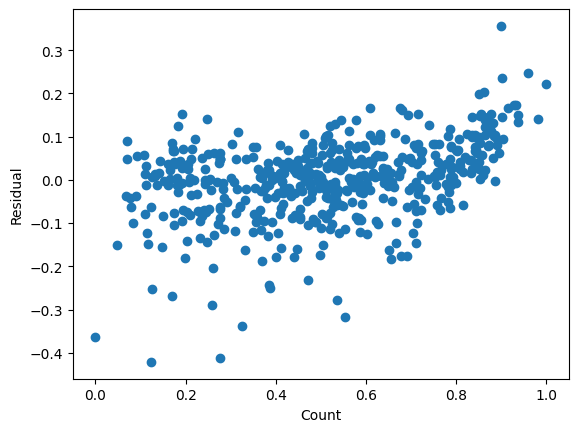

In [66]:
plt.scatter(y_train, res)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

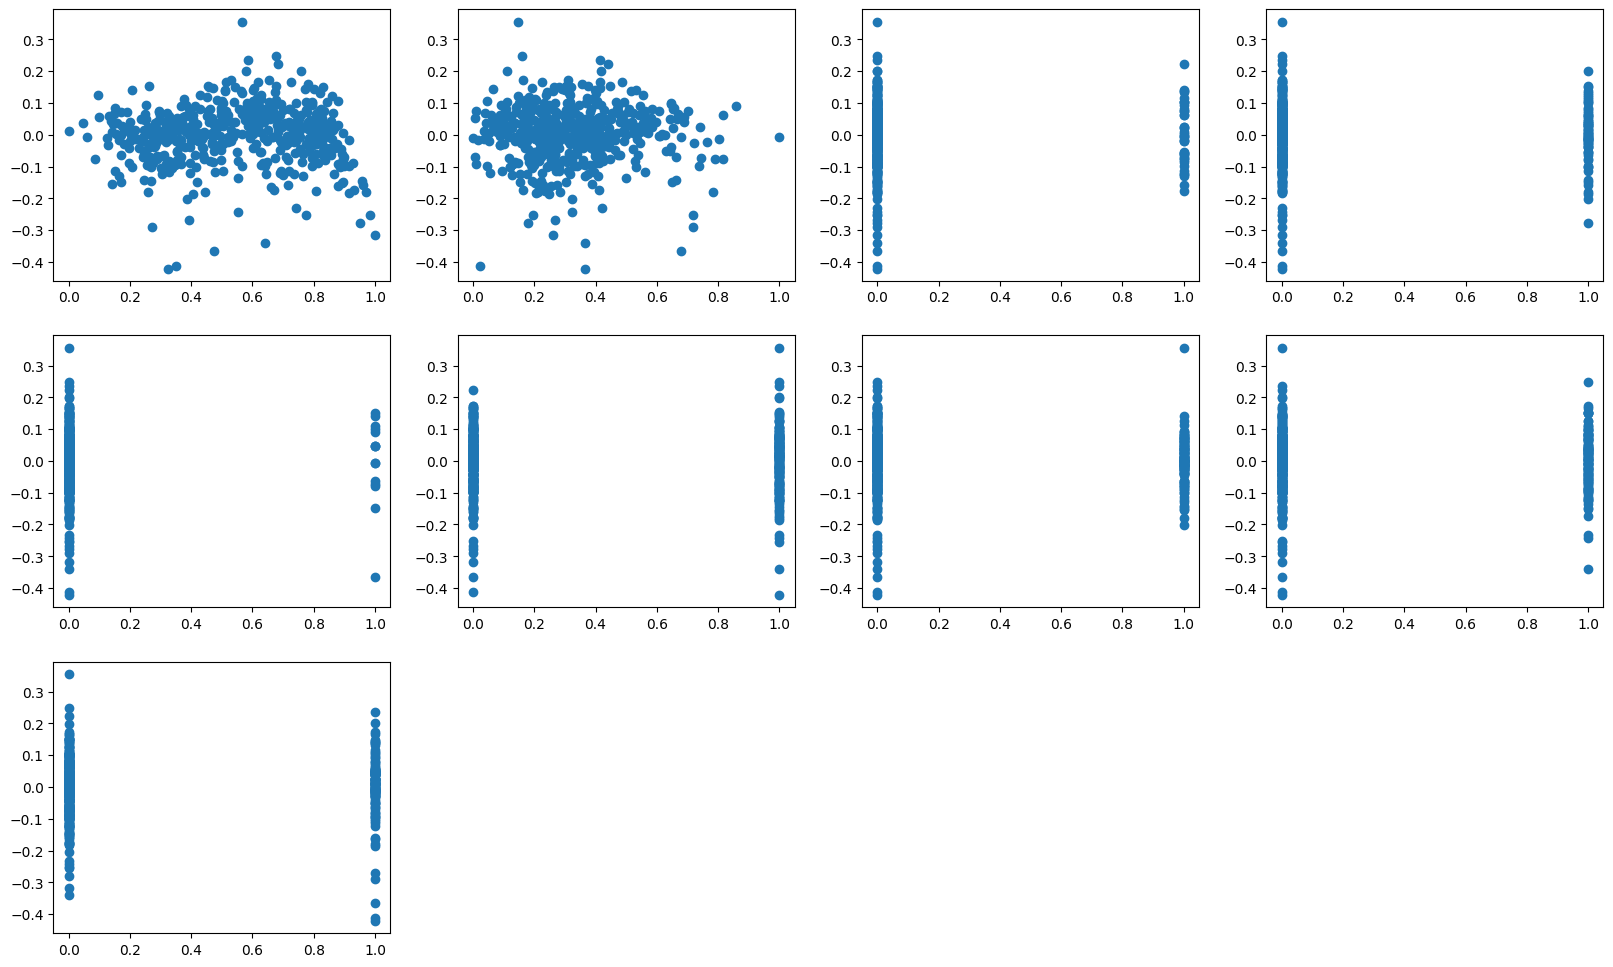

In [67]:
# Writing generic code to now check residual coorelation with all X variables

plt.figure(figsize=(20, 12))
for i in range(1, X_train.columns.size):
    plt.subplot(3,4,i)
    plt.scatter(X_train[X_train.columns[i]], res)

plt.show()

#### Multi Colinearity

In [68]:
# We have already checked that all VIF values are less than 5, just reprinting here
print_vif(X_train)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yearsSince2018,2.07
7,spring,2.00
8,summer,1.90
9,winter,1.64
6,misty,1.54
3,sep,1.22
4,sun,1.17
5,lightSnowRain,1.08


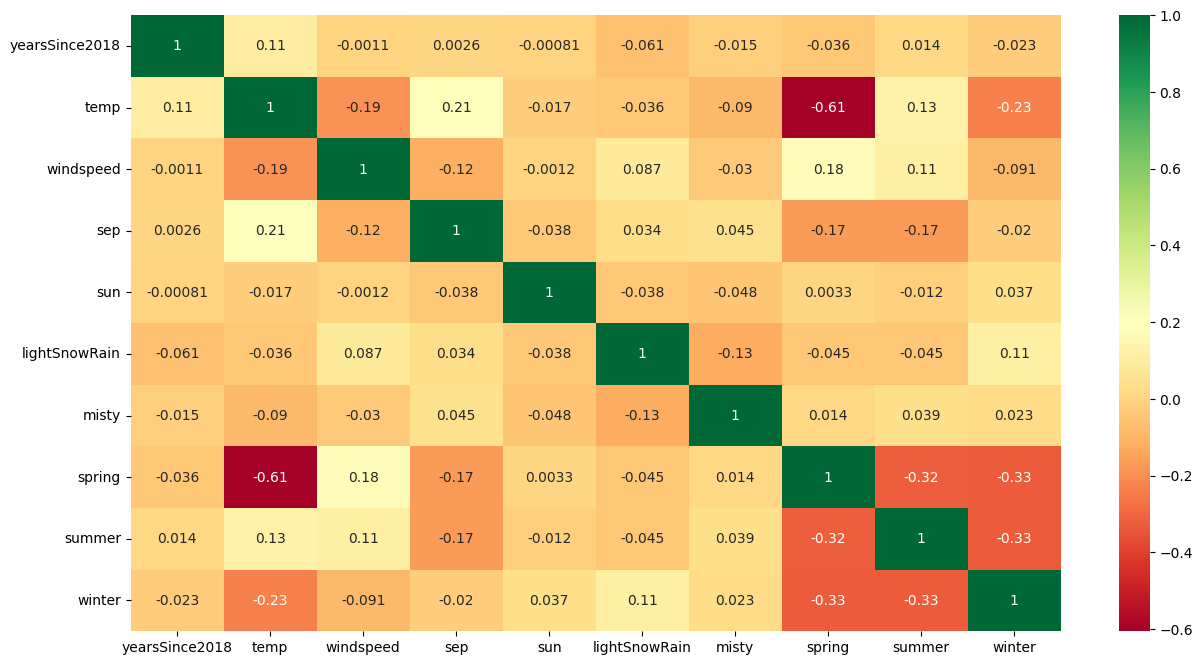

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### The residuals are normally distributed, and there are no visible patterns in the error terms. 
### So, this model fit looks good.

## Step 8: Making predictions using the Model

We will now use the final model lm_6 to make predictions on test data. We will further evaluate the accuracy of this model by comparing R2 of model prediction on test dataset against train dataset.
This will help us understand if the model shows same quality results on test data as compared to train data

In [70]:
# Scaling the test data set using same scaler which was fit on test dataset. This will make test data applicable to our final model

num_vars = ['temp','atemp','humidity','windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [71]:
df_test.describe()

,yearsSince2018,holiday,workingday,temp,atemp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,lightSnowRain,misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
X_train.head()

,yearsSince2018,temp,windspeed,sep,sun,lightSnowRain,misty,spring,summer,winter
653,1,0.509887,0.300794,0,0,0,0,0,0,1
576,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,1,1,0,0
728,1,0.245101,0.663106,0,1,0,0,1,0,0
482,1,0.395666,0.188475,0,0,0,1,0,1,0


In [73]:
# Splitting predictor (X) and outcome (y) variables
y_test = df_test.pop('count')
X_test = df_test

In [74]:
# Keeping only the predictor columns in X_test
predictorCols = X_train.columns
X_test = X_test[predictorCols]

In [75]:
# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

# Predicting using the model
y_test_pred = lm_6.predict(X_test_lm_6)

In [76]:
#R-square of model on test data set
r2_test = r2_score(y_test, y_test_pred)
round(r2_test,3)

0.803

In [77]:
#R-square of model on train data set
r2_train = r2_score(y_train, y_train_pred)
round(r2_train,3)

0.834

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

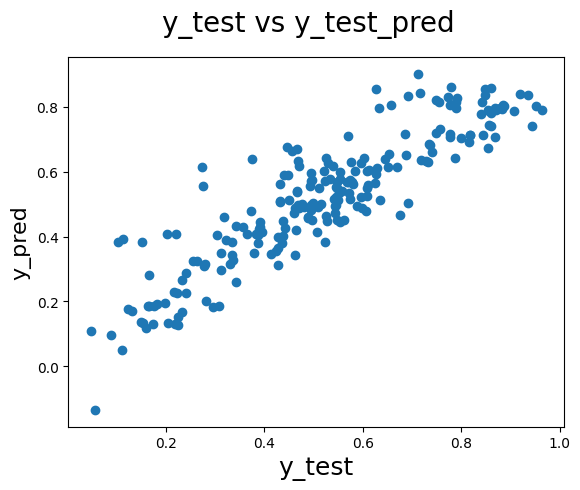

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 


# plt.scatter(X_test, y_test)
# plt.plot(X_test, y_test_pred, 'r')

#### We can see a **good linear relationship between y_pred & y_test** further validating the strength of our model

In [79]:
# Final model coefficients
round(lm_6.params,4)

const             0.1958
yearsSince2018    0.2343
temp              0.4799
windspeed        -0.1499
sep               0.0853
sun              -0.0462
lightSnowRain    -0.2865
misty            -0.0803
spring           -0.0570
summer            0.0613
winter            0.0951
dtype: float64


#### We can see that the equation of our best fitted line is:

`count = 0.1958 + (0.2343 * yearsSince2018) + (0.4799 * temp) + (-0.1499 * windspeed) + (0.0853 * sep) + (0.2343 * sun) + (-0.2865 * lightSnowRain) + (-0.0803 * misty) + (-0.0570 * spring) + (0.0613 * summer) + (0.0951 * winter)`

In [80]:
# Calculating Adjusted Rsquare value for the test dataset

adjusted_r2 = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(round(adjusted_r2, 3))

0.793


# Final Model Summary
   - **Train dataset** :
       - *R-Square* : 0.834
       - *Adjusted R-Square* : 0.830
   - **Test dataset** :
       - *R-Square* : 0.803
       - *Adjusted R-Square* : 0.793


## Variables impacting rental bikes count are :
    - year
    - temp
    - windspeed
    - sep
    - sun 
    - lightSnowRain
    - misty
    - spring
    - summer
    - winter